In [41]:
from qiskit import *
from qiskit.circuit.library import RYGate
import numpy as np
from qiskit_aer import Aer
pi = np.pi

In [42]:
def CRY(theta):
    return RYGate(theta).control(1)

def antiCRY(theta):
    return RYGate(theta).control(1, ctrl_state=0)

def prep_state(theta):
    qc = QuantumCircuit(2,2)

    qc.append(RYGate(theta[0]), [0])
    qc.append(antiCRY(theta[1]), [0,1])
    qc.append(CRY(theta[2]), [0,1])

    return qc

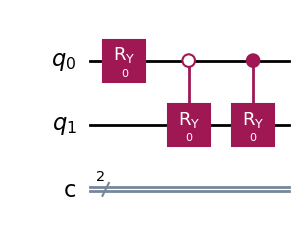

In [43]:
QC = prep_state([0, 0, 0])
QC.draw('mpl')

$\ket{\Psi} = cos(\theta_0/2) cos(\theta_1/2) \ket{00} + cos(\theta_0/2) sin(\theta_1/2) \ket{10} + sind(\theta_0/2) cos(\theta_2/2) \ket{01} + sin(\theta_0/2) sin(\theta_2/2) \ket{11} $ 

$\frac{d<H>}{d\theta_0} = cos(\theta_0/2 + \pi/2) cos(\theta_1/2) \ket{00} + cos(\theta_0/2 + \pi/2) sin(\theta_1/2) \ket{10} + sind(\theta_0/2 + \pi/2) cos(\theta_2/2) \ket{01} + sin(\theta_0/2 +\pi/2) sin(\theta_2/2) \ket{11} $ 

##Trick?!

$\frac{dE}{d\theta_i} = \frac{1}{2}(E_{theta_i+1/2} - E_{theta_i-1/2})$

In [44]:
def Hamilton(qc = QuantumCircuit(2)):
    qc.x([0,1])
    qc.y([0,1])
    qc.z([0,1])
    return qc

In [56]:
sim = Aer.get_backend('aer_simulator')
def Energy(state, shots):
    U = QuantumCircuit(2)
    U.cx(0,1)
    U.h(0)
    U.measure_all()

    trans = transpile(state.compose(U), sim)
    counts = sim.run(trans, shots=shots).result().get_counts()

    probs = {}
    for output in ['00','10','01','11']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0

    expect_val = probs['00'] - probs['01'] + probs['10'] - probs['11']

    return expect_val

In [35]:
def theta_new(theta, eta):
    theta[0] = theta[0] - eta/2* (Energy([theta[0]+pi/2, theta[1], theta[2]]) - Energy([theta[0]-pi/2, theta[1], theta[2]]))
    theta[1] = theta[1] - eta/2* (Energy([theta[0], theta[1]+pi/2, theta[2]]) - Energy([theta[0], theta[1]-pi/2, theta[2]]))
    theta[2] = theta[2] - eta/2* (Energy([theta[0], theta[1], theta[2]+pi/2]) - Energy([theta[0], theta[1], theta[2]-pi/2]))
    return theta

In [57]:
print(Energy(prep_state([0,0,0]),10))

0.39999999999999997


In [ ]:
def VQE_algo(theta, eta, rounds):
    for i in range(rounds):
        trans = transpile(Energy([0,0,0]), backend=sim)
        counts = sim.run(trans, shots=1).result()
        theta = theta_new(theta, eta)
    return theta

result = VQE_algo([0,0,0], 0.1, 10)
print(result)

TypeError: unsupported operand type(s) for -: 'QuantumCircuit' and 'QuantumCircuit'